# Neural Network

## Linear neural network
Author: Hsiu-Wen Chang, Center of Robotics, Mines Paristech, PSL
2025.11.03


Given features $x \in \bold{R}^d$ and target $y$ and assume they have linear relationship. Our goal is to choose the weights $w$ and the bias $b$ that , on average, make our model's predictions fit the true target $y$ as closely as possible. 
$$
\begin{split}
\hat{y}&=w_{1}x_{1}+w_{2}x_{2}+...+w_{d}x_{d}+b \\ &={\bold{w}^T\bold{x}}+b  \\&=\bold{X}\bold{w}+b
\end{split}
$$

where b is bias, vectors are expressed as lowercase and  in bold; matix are expressed as uppercase and in bold, $\bold{X} \in \bold{R}^{n\times d}$. Oftenly, augmented input $[\bold{x},1]$ and augmented weight $[\bold{w},b]$  are used to form an easier math
$$
\hat{y}=\bold{w}^T\bold{x}
$$

In [15]:
# This example show you the speed difference between values operation and vector operation

import numpy as np
import time

# using normal values
x = np.array([1, 2,3]) # d is three is this example
y = np.array([14])
w = np.ones_like(x)
b=0.0
y_hat = np.dot(w, x)+b
print(y_hat)

# using augmented vectors
x_aug = np.append(x, 1)  # Augment x with a bias term
w_aug = np.append(w, b)  # Augment w with the bias weight
y_hat_aug = np.dot(w_aug, x_aug)
print(y_hat_aug)  

# using matrix multiplication for learning batch concept
x2 = np.array([[1, 2, 3],[1,-3, 0]]) #2x3 matrix (2 samples, 3 features)
y2 = np.array([[14,-5]]) #assume we have two targets
w2 = np.ones((x2.shape[1], 1))
b2 = 0
y_hat2 = np.matmul(x2,w2) + b2
print(y_hat2)  # Output: [[7. 7.]

# time difference test between values operation and matrix operation
# using normal values
start_time = time.time()
for i in range(x2.shape[0]):   
    y_hat2[i] = np.dot(w2.T, x2[i]) + b2
end_time = time.time()
print(f"Time taken scalar operations: {end_time - start_time} seconds")   

# using matrix operation
start_time = time.time()
y_hat2 = x2@w2 + b2
end_time = time.time()
print(f"Time taken matrix operations: {end_time - start_time} seconds")

6.0
6.0
[[ 6.]
 [-2.]]
Time taken scalar operations: 0.0002760887145996094 seconds
Time taken matrix operations: 5.2928924560546875e-05 seconds


Denote the difference between target and current predition $l(w)=\hat{y}-y$ as loss function, we can adjust w by using partial deriviative in order to minimize the loss function:
$$
\begin{split}
\Delta{\bold{w}} &=\frac{\partial l}{\partial w}=\frac{\bold{w}^T\bold{x}-y}{\partial w}=\bold{x} \\
\bold{w} &= \bold{w}+\alpha\Delta{\bold{w}} = \bold{w} + \bold{x}
\end{split}
$$

where $\Delta \bold{w}$ is called gradient$, $\alpha$ is leaning rate and is typically a hyper parameter. There are varient algorithm to automatically adjust learning rate, or use second derivative (momentum), see reference [1].  

### Geomatrical meaning for training model

For a 2D function $y=f(x_1,x_2)=w_1*x_1+w_2*x_2=\vec{w}\cdot\vec{x}$, any points that satisfy this function means they line on the line and sample vector $\bold{\vec{x}}$ is vertical to norm vector (weight vector) $\bold{\vec{w}}$. For this simple low dimentional and linear problem, we can see the update involve simple x. This is how the first perceptron has been invented and trained in 1984 by Warren McCulloch and Walter Pitts. Since we can not change $\bold{\vec{x}}$, the optimization is a study of the weight space. The study of weight space is important for all optimization algorithms. The gradient update moves the weight in the direction of the vertical gradient of the error curve. If the loss function has a complicated landscape and exist several local minima or saddle points, then we need to know how to adjust the optimizer to reach better performance.

#### Question: What happen when points are not on the target function? 

If $y-\hat{y} > 0$, vectors $\vec{\bold{x}}$ and $\vec{\bold{w}}$ has an angle smaller than 90 degree. If the angle is more than 90 degree, then $ $y-\hat{y} < 0$. In fact, this is a good inspiration for binary classficatioin if the target is either 1 or 0. We can now further extend our simple neural network to work on binary case. Naturally, the representation of multi-classes classification will use $y\ in {1,2,3,..,n}$, but from this point, we can see the better way to solve the problem is find a way with 0 and 1 values. Since we can continue this fast and simple neurom but with multiple ones that can take care different category. This is called one-hot encoding: $ y \in {{(1,0,..,0), (0,1,..,0),..(0,...,0,1)}}$. Can you think about another reason that this is better?

### Performance: Loss function
Given $n$ number f the target $y$ and observation $x$, the performance of the model is based on the cost function (average of several loss functions). The simplest one is the average of distance between the real and predicted values of the target. $$ L(\bold{w},b)=\frac{1}{n}\sum_{i=1}^{n}l^{(i)}(\bold{w},b)=\frac{1}{n}\sum_{i=1}^{n}(\frac{1}{2}(\bold{w}^T{\bold{x}^{(i)}+b-y^{(i)}})^2)$$

When training the model, we seek optimal parameters $\bold{w}^*,b^*$ that minimize the total loss across all training examples:
$$
\bold{w}^*,b^*=\argmin_{\bold{w},b}L(\bold{w},b)
$$

The question is, when do we update the weight? Three types of graident descent:
- Batch gradient descent: sums over the error for each point in a training set, updating the model only after all training examples. It produces a stable error gradient and convergence, but needs to store all of the data into memory and less efficient
- Stochastic gradient descent (SGD): it updates model each training example's parameters one at a time, therefore, it is faster and less cost of memory. However, it can be less efficient when compared to batch gradient descent. Major problem in computation is that processors are a lof of faster multiplying and adding numbers tahn they are at moving data from main memory to processor cache. This means that it can take a lot longer to process one sample at a simte compared to full batch. A scond problem is that some of the modern layers of neural network operation, such as batch normalization, only work well when we have access to more than one observation at a time
- Minibatch gradient descent [2]: this is mixed method of two previous methods. The specific choice of the size of minibatch depends on amount of memory, the number of accelerators, the choice of layers, and the total dataset size. Despite all that, a number between 32 and 256 is a good start. 

## Minibatch stochastic gradient descent

For each iteration $t$, we randomly sample a minibatch $\mathcal{B}_t$ consisting of a fixed number $|\mathcal{B}|$ of training examples, then we compute the derivative of the average loss on the minibatch with respect to the model parameters:
$$
\begin{split}\begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) &&  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}
$$

inital weights:[[0.95542267 0.9082419  0.96514274]], initial bias:[0.36520383]
final Loss: 1.7163452213929765e-06
estimated weights:[[1.29895268 2.3356529  2.43994335]], estiamated bias:[0.70873384]
True weights: [[1],[2],[3]]


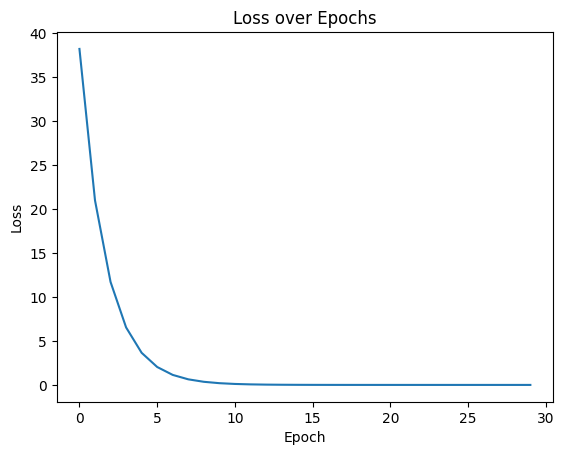

In [37]:
learning_rate = 0.1
epoch = 30
# step 1: intialize parameters with random number between 0 to 1
w2=np.random.rand(x2.shape[1], 1)
b2=np.random.rand(1)
print(f"inital weights:{w2.T}, initial bias:{b2}")
loss_history = []
for t in range(epoch):
    # step 2: compute the prediction
    y_hat2 = np.dot(x2, w2) + b2

    # step 3: compute the loss (mean squared error)
    loss = np.mean((y2 - y_hat2.T) ** 2)
    loss_history.append(loss)
    #print(f"t={t}: Loss:", loss)

    # step 4: compute the gradients
    m = x2.shape[0]  # number of samples
    dw = (-2/m) * np.dot(x2.T, (y2.T - y_hat2))
    db = (-2/m) * np.sum(y2.T - y_hat2)

    # step 5: update the parameters
    w2 -= learning_rate * dw
    b2 -= learning_rate * db

print(f"final Loss:", loss)

print(f"estimated weights:{w2.T}, estiamated bias:{b2}")
print("True weights: [[1],[2],[3]]")
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

## Generalization

It is important to understand that the estimated weight and bias are not determinisim even our function is truly linear and noiseless because of the randomness of minibatches. In practice, deep learning practitioners are not trying to find parameters that minimize the cost on training sets, they search for accurate predictions on previouly unseen data (test dataset), a challenge called $\textbf{generalization}$. The loss function discussed above only uses training data, so it is training error. While we use test data into loss function, we can get generalization error which is impoartant for evaluation.

In the standard supervised learning setting, we assume that the training data and the test data are drawn independently from identical distributions, called IID assumption. Classically, when we have simple models and the abundant data, the training and generalization errors tend to be close. However, when we work with more comple models and/or fewer examples, the training error can go down but the generalization gap will grow. Polynomial curving fitting is a good example.
$$
\hat{y}=\Sigma_{i=0}^{d}x^{i}w_i
$$

coeffs for higher polynomial (highest->lowest): [ 0.00084807 -0.00163796 -0.0090232   0.06355944  0.7555235   0.24023409]
coeffs for lower polynomial (highest->lowest): [ 1.02785518 -0.05881525]
training loss with higher polynomial: 2.9582283945787943e-31
training loss with lower polynomial: 0.00838641550215443
test loss with higher polynomial: 0.01337455749516868
test loss with lower polynomial: 0.003090592936871302


/tmp/ipykernel_12983/2680503305.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs_h = np.polyfit(x, y, deg=5)  # higher degree polynomial


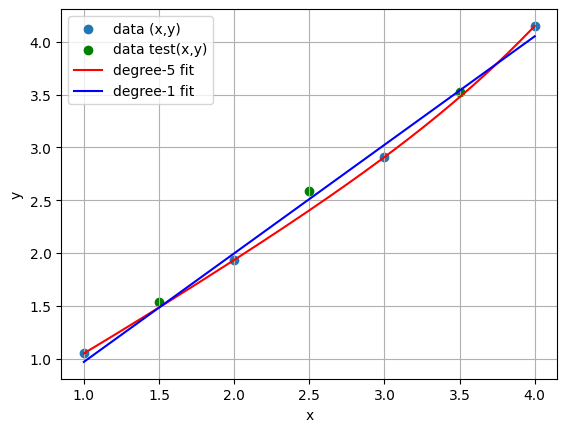

In [69]:
# This example show you the overfitting and generalization issue using polynomial fitting
x = np.array([1, 2, 3, 4])
y = x +np.random.randn(4) * 0.1 # true function is y = x with noise 0.1
x_test = np.array([1.5, 2.5, 3.5])
y_test = x_test+np.random.randn(3) * 0.1

# fit polynomial (will exactly interpolate 4 points)
coeffs_h = np.polyfit(x, y, deg=5)  # higher degree polynomial
coeffs_l = np.polyfit(x, y, deg=1)  # true degree is 1
print('coeffs for higher polynomial (highest->lowest):', coeffs_h)
print('coeffs for lower polynomial (highest->lowest):', coeffs_l)

# build polynomial and evaluate
ph = np.poly1d(coeffs_h)
pl = np.poly1d(coeffs_l)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = ph(x_fit)
y_fit_l = pl(x_fit)
y_pred = ph(x)
y_pred_l = pl(x)
y_test_pred = ph(x_test)
y_test_pred_l = pl(x_test)
print('training loss with higher polynomial:', np.mean((y - y_pred)**2))
print('training loss with lower polynomial:', np.mean((y - y_pred_l)**2))
print('test loss with higher polynomial:', np.mean((y_test - y_test_pred)**2))
print('test loss with lower polynomial:', np.mean((y_test - y_test_pred_l)**2))

# plot data and fitted polynomial
plt.scatter(x, y, color='C0', label='data (x,y)')
plt.scatter(x_test, y_test, color='g', label='data test(x,y)')
plt.plot(x_fit, y_fit, 'r-', label='degree-5 fit')
plt.plot(x_fit, y_fit_l, 'b-', label='degree-1 fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


As the above bound already indicates, another big consideration to bear in mind is $\textbf{dataset size}$. Fixing our model, the fewer samples we have in the training dataset, the more likely (and more severely) we are to encounter overfitting. As we increase the amount of training data, the generalization error typically decreases. Moreover, in general, more data never hurts. For a fixed task and data distribution, model complexity should not increase more rapidly than the amount of data. Given more data, we might attempt to fit a more complex model. Absent sufficient data, simpler models may be more difficult to beat. For many tasks, deep learning only outperforms linear models when many thousands of training examples are available. In part, the current success of deep learning owes considerably to the abundance of massive datasets arising from Internet companies, cheap storage, connected devices, and the broad digitization of the economy.

## Regularization

Beside collecting more training data for mitigating overfitting issue, we can use sevearl other techniques to avoid it. One is called weight decay by tweaking the degree of the fitted polynomial. This is achieved by restricting the values that the parameters can take: adding $l_p$ norm into loss function. This is called penalty. To control how much penalty should be considered in the loss function, a nonnegative parameter, regulization constant $\lambda$ is introduced.
$$
L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^p
$$

$l_2$ and $l_1$ norm are the most common methods in this regularization. Let p=2, we can derive the minibatch stochastic gradient descent updates as follows:
$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

Let's see this example that is trying to learn the function of 
$$
y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \textrm{ where } \epsilon \sim \mathcal{N}(0, 0.01^2)
$$

Training the model with weight decay...
Training the model without weight decay...


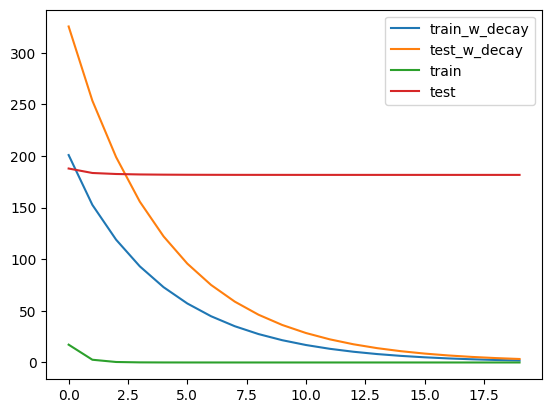

In [94]:
num_inputs=200
num_train=20
num_test=100
batch_size=5

#generate dataset
n=num_train+num_test
X=np.random.randn(n, num_inputs)
noise=np.random.randn(n,1)*0.01
w, b = np.ones((num_inputs, 1)) * 0.01, 0.05
y=np.dot(X, w) + b + noise

#defind l2 norm penalty
def l2_penalty(w):
    return np.sum(w**2)/2

#define loss function
def compute_loss(X, y, w, b, weight_decay):
    num_samples = X.shape[0]
    y_pred = np.dot(X, w) + b
    mse_loss = np.mean((y_pred - y) ** 2)
    l2_loss = weight_decay * l2_penalty(w)
    total_loss = mse_loss + l2_loss
    return total_loss


# define model training function with mini-batch gradient descent and weight decay
def train_model(X_train, y_train, X_test, y_test, learning_rate, weight_decay, num_epochs, batch_size):
    num_samples, num_features = X_train.shape
    w = np.random.randn(num_features, 1)
    b = 0.0
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        # Shuffle the training data
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        # Mini-batch gradient descent
        for start in range(0, num_samples, batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Compute predictions
            y_pred = np.dot(X_batch, w) + b

            # Compute gradients
            error = y_pred - y_batch
            dw = (2 / batch_size) * np.dot(X_batch.T, error) + weight_decay * w
            db = (2 / batch_size) * np.sum(error)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

        train_loss.append(compute_loss(X_train, y_train, w, b, weight_decay))
        test_loss.append(compute_loss(X_test, y_test, w, b, weight_decay))

    return w, b, train_loss, test_loss

# Split the dataset into training and testing sets
X_train, y_train = X[:num_train], y[:num_train]
X_test, y_test = X[num_train:], y[num_train:]
# Train the model
learning_rate = 0.01
weight_decay = 3
num_epochs = 20

print("Training the model with weight decay...")
w, b, train_loss1, test_loss1 = train_model(X_train, y_train, X_test, y_test, learning_rate, weight_decay, num_epochs, batch_size)
print("Training the model without weight decay...")
w_no_decay, b_no_decay, train_loss2, test_loss2 = train_model(X_train, y_train, X_test, y_test, learning_rate, 0, num_epochs, batch_size)

plt.plot(train_loss1,label='train_w_decay')
plt.plot(test_loss1, label= 'test_w_decay')
plt.plot(train_loss2,label='train')
plt.plot(test_loss2, label= 'test')
plt.legend()

## Maximum likelihood

One of the most commonly encountered way of thinking in machine learning is the maximum likelihood point of view. The concept is that when working with a probabilistic model with unknown parameters, the parameters which make the data have the highest probability are the most likely ones. The conditinal mean $E[Y|X=x]$ can be expressed as a weight sum of the features $x$. This setup allows that the target value $y$ may still deviate from its expected value on account of observation noise. 
$$
y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \textrm{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

$\mathcal{N}$ is Gaussian (normal) distribution. The best values of model parameters are those that maximize the likelihood of the entire dataset (given $\mathbf{X}$, the probability of having $\mathbf{y}$), called maximum likelihood estimator (MLE):

$$
\begin{split}
P(y \mid \mathbf{x}) &= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)\\
P(\mathbf Y \mid \mathbf X) &= \prod_{i=1}^{n} p(y^{(i)} \mid \mathbf{x}^{(i)}) \\
\hat{\theta}_{MLE} &=\argmax_{\theta}{\{\log{\prod_{i=1}^{n} p(y^{(i)} \mid \mathbf{x}^{(i)})}\}} \\
&= \argmax{\sum_{i=1}^n{\frac{-(y_i-(\bold{\mathbf{w}^T x_i})^2)}{2\sigma^2}}}
\end{split}
$$


## Linear regression for classification

What happen when points are not on the target function? We can see the Given a 2x2 grayscale image, we can represent each pixel value with a single scalar, giveng us four features $x_1,x_2,x_3,x_4$. Assume that each image to one among the categories "cat", "dot" and "chicken" and we use one-hot encoding style: $y \in {\{(1,0,0),(0,1,0),(0,0,1)\}}$. In order to estimat the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class. This yeilds:
$$
\begin{split}
o_1 &= x_{1}w_{11}+x_{2}w_{12}+x_{3}w_{13}+x_{3}w_{14}+b_1 \\
o_2 &= x_{1}w_{21}+x_{2}w_{22}+x_{3}w_{23}+x_{3}w_{24}+b_2\\
o_3 &= x_{1}w_{31}+x_{2}w_{32}+x_{3}w_{33}+x_{3}w_{34}+b_3\\
\bold{o} &= \bold{W}\bold{x}+\bold{b}
\end{split}
$$

Generally, treating classification as a vector-valued regression problem works in this case. However, we are more instereting to get the probabilities of each categoris given sample x. In these equations, here is no guarantee that the outputs sum up to 1 in the way we expect probabilities to have. Also, they can be negative even if their outputs sum up to 1. Let us use $\bold{y=o+\epsilon}$, where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$. The use of exponential function accomplish this goal that the conditional probability increases with increasing $o_i$, it is monotonic, and all probabilities are nonnegative. One last step is to add up outputs to 1 by dividing each by their sum. Then we get softmax function:
$$
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.
$$

From statistic view, the softmax function gives us a vector $\hat{y}$, which we can interpret as conditional probabilities of each class, given any input $x$, such as $\hat{y}_1=P(y=cat|x)$. Since maximizing the product of likelihood prbabilities is awkard, we take the negative logrithm to obtain the equivalent problem of minimizing the negative log-likelihood:
$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$
where for any pair of label $y$ and model prediction $\hat{y}$ over $q$ classes, the loss function $l$ (cross-entropy loss) is:
$$
l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j.
$$

$\textbf{Question}$: What is the benefit of using cross-entropy loss function? (Hint: substitude $\hat{y}_j$ in to corss-entropy function and see the result of derivative with respect to $o_j$

$\textbf{Ans}$: 
$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$
In other words, the derivative is the difference between the probability assigned by our model, as expressed by the softmax operation, and what actually happened, as expressed by elements in the one-hot label vector. This makes it the same in regression where the gradient was the difference between obersvation and estimate output. 

In [11]:
### Example of training with Fashion MNIST dataset, it contains images of 10 categories of clothing items at 28x28 pixels resolution.
import numpy as np

# Loading the Fashion MNIST dataset
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the dataset, here we upscale images to 32x32 and normalize them
trans= transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=trans)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=trans)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("Fashion MNIST dataset size:", len(train_dataset), "training samples,", len(test_dataset), "test samples")
print("Image shape [c,h,w]:", train_dataset[0][0].shape)

Fashion MNIST dataset size: 60000 training samples, 10000 test samples
Image shape [c,h,w]: torch.Size([1, 32, 32])


In [13]:
# Text labels for Fashion MNIST
text_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",    
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
print(text_labels[0])

T-shirt/top


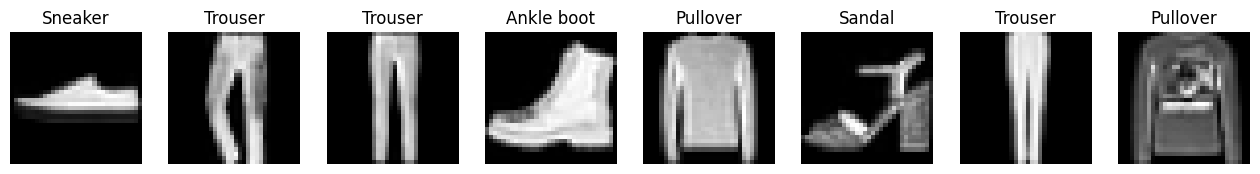

In [17]:
#visualization example
import matplotlib.pyplot as plt 
def imshow(imgs, num_rows=1, num_cols=8, titles=None):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i in range(num_rows * num_cols):
        ax = axes[i] if num_rows > 1 else axes[i % num_cols]
        img = imgs[i].numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.show()

batch=next(iter(train_dataloader))
images, y = batch
imshow(images, 1,8,[text_labels[label.item()] for label in y])  # show images for label 8 (Bag)

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
### The classifier class with softmax output
class classifier:
    def __init__(self, input_size, num_classes):
            self.weights = torch.randn(input_size, num_classes) * 0.01
            self.bias = torch.zeros(num_classes)   
    def forward(self, x):
            logits = x @ self.weights + self.bias  # Linear transformation
            exp_logits = torch.exp(logits - torch.max(logits, dim=1, keepdim=True).values)  # for numerical stability
            probabilities = exp_logits / torch.sum(exp_logits, dim=1, keepdim=True)  # Softmax
            return probabilities
    

#define optimizer and loss function
optimizer = optim.SGD(params=[{'params': [ 'weights', 'bias']}], lr=0.1)
loss_fn = F.cross_entropy

model = classifier(input_size=32*32, num_classes=10)
# Training loop for epoch in range(5):
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_dataloader:
        images = images.view(images.size(0), -1)  # Flatten the images
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

TypeError: optimizer can only optimize Tensors, but one of the params is str

## Optional material: Information Theory

Information theory concerns with encoding, decoding, and manipulation of information (a.k.a. data). The central ideal of information theory is to quantify the amount of information contained in data, thereby limiting our ability to compress it. For a distribution P, its $\textbf{entropy}$  $H[P]$ is defined as:
$$
H[P] = \sum_j - P(j) \log P(j).
$$
One of the fundamental theorems of information theory states that in order to encode data drawn randomly from the distribution $P$, we need at least $H[P]$ "bats" to encode it [3]
 “nats” to encode it. Here, nat is equivalent of bit but when using a code with base $e$ rather than one with base 2. Thus, one nat is $\frac{1}{\log(2)} \approx 1.44$
 When a stream of data is easy to compress, it is easy to predict the next token. Surprisal is introduced to quantify one's surprisal at observaing an envent $j$ having assigned it a probability $P(j)$. This means, if we cannot perfectly predict every event, then we might be surprised. Our surprise is greater when an envent is assigned lower probability. 

 The entropy here, is the expected surprisal when one assigned the correct probabilities that truly match the data-generating process.

## Reference
[1] https://www.ceremade.dauphine.fr/~waldspurger/tds/22_23_s1/advanced_gradient_descent.pdf

[2] Li, M., Zhang, T., Chen, Y., & Smola, A. J. (2014). Efficient mini-batch training for stochastic optimization. Proceedings of the 20th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 661–670)

[3] Shannon, 1948
Shannon, C. E. (1948). A mathematical theory of communication. The Bell System Technical Journal, 27(3), 379–423.

$\textbf{Question}$: 
In Bayesian statistics, a posterior $P(\theta|y) $ is derived by the use of product of prior $P(\theta) $ and the likelihood $P(y|\theta)$. How can you idientify $P(\theta)$ with regularization? y:observation, $\theta$: learning parameter
Recall maximun likelihood estimation (MLE): 
$$
\begin{split}
P(y|\theta) &=\prod_{i=1}^{n}P_Y{(y_i|\theta,\sigma^2)} \\
&=\prod_{i=1}^n{\frac{1}{\sigma \sqrt{2\pi}}}e^{\frac{-(y_i-(\theta_0+\theta_1x_{i,1}+...+\beta_{p}x_{i,p}))^2}{2\sigma^2}}
\end{split}
$$

This means the data points are normally distributed (gaussian distribution). The approximate this distribution, number of data, $n$, has to be sufficient. In case of smaller data set, we can add the priori knowledge of $\theta$ (distribution) to increase the accuracy, that is maximun posterior estimation (MAP): 
$$
\begin{split}
P(\theta|y)&=\frac{P(y|\theta)P(\theta)}{P(y)}\\ 
&=\frac{likelihood \cdot prior}{evidence}
\end{split}
$$

$\textbf{Ans}$: 

The choice of $P(\theta)$ can encode our knoweldge of the problem, here is how it works:
$$
\begin{split}
\hat{\theta}_{MAP}&=\argmax_{\theta}{P(\theta|y)}\\&=\argmax_{\theta}{\log{P(y|\theta)P(\theta)}}\\
&=\argmax_{\theta}{(\log{P(y|\theta)}+\log{P(\theta)})}
\end{split}
$$

Situation (1): if we have no prior knowledge of the distribution of $\theta$, then $\hat{\theta}_{MAP}=\hat{\theta}_{MLE}=\argmax_{\theta}{\log{P(y|\theta)}}$.

Situation (2): Assume the distribution of y and $\theta$ are normal with zero-means and variace $\sigma, \tau$, respectively. Substitude these distribution in to MAP estimation we can derive:
$$
\begin{split}
\hat{\theta}_{MAP}&=\argmax_{\theta}[\log{\prod_{i=1}^n{\frac{1}{\sigma \sqrt{2\pi}}}e^{\frac{-(y_i-(\bold{\theta X_i})^2)}{2\sigma^2}}}
+\log{\prod_{j=0}^p{\frac{1}{\tau\sqrt{2\pi}}{e^{\frac{-\theta_j^2}{2\tau^2}}}}}] \\
&=\argmax_{\theta}{[-\sum_{i=1}^n{\frac{-(y_i-(\bold{\theta X_i}))^2}{2\sigma^2}}-{\sum_{j=0}^p{\frac{-\theta_j^2}{2\tau^2}}}]}\\
&=\argmax_{\theta}{\frac{1}{2\sigma^2}[-\sum_{i=1}^n{-(y_i-(\bold{\theta X_i}))^2}+{\frac{\sigma^2}{\tau^2}\sum_{j=0}^p{\theta_j^2}}]}
\end{split}

$$ 

Now we can see the choice of $P(\theta)$ equal to the use of L2 regularization with $\lambda=\sigma^2/\tau^2$. If we have a small variance (large $\lambda$) the the coefficients will be close to zero; if a large variace (small $\lambda$) then the coefficients will not be affected much (close to no reqularization)

$\textbf{Question:}$ Compute the second derivative of the cross-entropy loss for softmax

$\textbf{Ans}$: $\frac{\partial^2 l(\mathbf{y}, \hat{\mathbf{y}})}{{{o_j^2}}} = \mathrm{softmax}(\mathbf{o})_j \cdot (1- \mathrm{softmax}(\mathbf{o})_j)$

